In [32]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import Imputer, scale
warnings.filterwarnings("ignore")
from imblearn.under_sampling import InstanceHardnessThreshold

In [33]:
df = pd.read_csv("airline_final.csv",sep=",")
df

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0
5,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Dzano Edin,Germany,2014-06-08,Sarajevo-Frankfurt via Ljubljana. I loved flyi...,NaN,NaN,Economy,NaN,9.0,4.0,4.0,3.0,3.0,NaN,NaN,4.0,1
6,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,M Tushishvili,France,2014-06-01,I had flights from Paris to Sarajevo via Ljubl...,NaN,NaN,Economy,NaN,5.0,4.0,4.0,1.0,0.0,NaN,NaN,3.0,1
7,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,M Znidar,Slovenia,2014-05-10,LJU to FRA and back both flights were on time....,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,3.0,NaN,NaN,4.0,1
8,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-01-13,On my Ljubljana - Munich flight in business cl...,NaN,NaN,Business Class,NaN,8.0,4.0,3.0,4.0,1.0,NaN,NaN,4.0,1
9,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,M Znidar,Slovenia,2014-01-06,Flights from LJU to ZRH and back all on time. ...,NaN,NaN,Economy,NaN,10.0,5.0,5.0,4.0,4.0,NaN,NaN,4.0,1


In [34]:
keywords = ["air-india","spicejet","jet-airways","indigo-airlines","goair","airasia","air-india-express"]

# filter the data: keep only the rows that contain one of the keywords 
# in the position or the Job description columns
df = df[df["airline_name"].isin(keywords)] 
# write the data back to a csv file 
df.to_csv("extracted.csv",sep=",", index=False)


In [35]:
df_india = pd.read_csv("extracted.csv",sep=",")
df_india

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,air-india,/airline-reviews/air-india,Air India customer review,Anzaar Khan,India,2015-07-31,"Legroom comfortable, cabin very quiet and LED ...",Boeing 787-800,Solo Leisure,Economy,Dubai to Bangalore via Delhi,9.0,5.0,5.0,4.0,3.0,4.0,NaN,5.0,1
1,air-india,/airline-reviews/air-india,Air India customer review,Ranjit Pradhan,United States,2015-07-28,The positives: The Dreamliner is an excellent ...,Boeing 787,Solo Leisure,Business Class,Shanghai to Delhi,7.0,5.0,5.0,5.0,3.0,3.0,NaN,4.0,1
2,air-india,/airline-reviews/air-india,Air India customer review,Mike Halpenny,New Zealand,2015-07-27,Flight of 9 hours from Delhi to London on 777-...,Boeing 777-300,Couple Leisure,Economy,Delhi to London,8.0,5.0,4.0,4.0,3.0,4.0,NaN,4.0,1
3,air-india,/airline-reviews/air-india,Air India customer review,Mike Halpenny,New Zealand,2015-07-27,Evening flight from Heathrow on Air India 777-...,Boeing 777-300,Couple Leisure,Economy,London to Delhi,8.0,5.0,4.0,4.0,3.0,4.0,NaN,4.0,1
4,air-india,/airline-reviews/air-india,Air India customer review,Mike Halpenny,New Zealand,2015-07-27,Air India Dreamliner from Delhi to Melbourne p...,Boeing 787 Dreamliner,Couple Leisure,Economy,Delhi to Melbourne,8.0,4.0,4.0,4.0,3.0,5.0,NaN,4.0,1
5,air-india,/airline-reviews/air-india,Air India customer review,Mike Halpenny,New Zealand,2015-07-27,Flew Air India Dreamliner from Melbourne to De...,Boeing 787,Couple Leisure,Economy,Melbourne to Delhi,8.0,4.0,4.0,5.0,3.0,4.0,NaN,5.0,1
6,air-india,/airline-reviews/air-india,Air India customer review,Sreenath Pillai,France,2015-07-26,The quality of the airline has deteriorated ba...,Boeing 787,Solo Leisure,Economy,BOM to CDG via DEL,6.0,4.0,4.0,4.0,2.0,1.0,1.0,4.0,1
7,air-india,/airline-reviews/air-india,Air India customer review,Davide liseno,Italy,2015-07-25,The flight AI301 scheduled at 7am of 14th May ...,Boeing 787,Solo Leisure,Economy,Melbourne to Milan via Delhi,1.0,2.0,2.0,1.0,2.0,1.0,NaN,2.0,0
8,air-india,/airline-reviews/air-india,Air India customer review,Abdul Hamid Jacob-Hassan,France,2015-07-23,Flight was half empty. Crew were cordial and f...,Boeing 787,Couple Leisure,Economy,Singapore to Chennai,4.0,4.0,3.0,2.0,2.0,5.0,NaN,3.0,1
9,air-india,/airline-reviews/air-india,Air India customer review,Lawrence McElroy,United States,2015-07-19,I read some bad reviews but it was mentioned t...,Boeing 787,FamilyLeisure,Economy,Paris to Delhi,1.0,1.0,2.0,1.0,1.0,2.0,NaN,2.0,0


In [36]:
df_india['overall_rating'].fillna((df_india['overall_rating'].mean()),inplace=True)
df_india['overall_rating'] = [int(i) for i in df_india['overall_rating']]
df_india 

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,air-india,/airline-reviews/air-india,Air India customer review,Anzaar Khan,India,2015-07-31,"Legroom comfortable, cabin very quiet and LED ...",Boeing 787-800,Solo Leisure,Economy,Dubai to Bangalore via Delhi,9,5.0,5.0,4.0,3.0,4.0,NaN,5.0,1
1,air-india,/airline-reviews/air-india,Air India customer review,Ranjit Pradhan,United States,2015-07-28,The positives: The Dreamliner is an excellent ...,Boeing 787,Solo Leisure,Business Class,Shanghai to Delhi,7,5.0,5.0,5.0,3.0,3.0,NaN,4.0,1
2,air-india,/airline-reviews/air-india,Air India customer review,Mike Halpenny,New Zealand,2015-07-27,Flight of 9 hours from Delhi to London on 777-...,Boeing 777-300,Couple Leisure,Economy,Delhi to London,8,5.0,4.0,4.0,3.0,4.0,NaN,4.0,1
3,air-india,/airline-reviews/air-india,Air India customer review,Mike Halpenny,New Zealand,2015-07-27,Evening flight from Heathrow on Air India 777-...,Boeing 777-300,Couple Leisure,Economy,London to Delhi,8,5.0,4.0,4.0,3.0,4.0,NaN,4.0,1
4,air-india,/airline-reviews/air-india,Air India customer review,Mike Halpenny,New Zealand,2015-07-27,Air India Dreamliner from Delhi to Melbourne p...,Boeing 787 Dreamliner,Couple Leisure,Economy,Delhi to Melbourne,8,4.0,4.0,4.0,3.0,5.0,NaN,4.0,1
5,air-india,/airline-reviews/air-india,Air India customer review,Mike Halpenny,New Zealand,2015-07-27,Flew Air India Dreamliner from Melbourne to De...,Boeing 787,Couple Leisure,Economy,Melbourne to Delhi,8,4.0,4.0,5.0,3.0,4.0,NaN,5.0,1
6,air-india,/airline-reviews/air-india,Air India customer review,Sreenath Pillai,France,2015-07-26,The quality of the airline has deteriorated ba...,Boeing 787,Solo Leisure,Economy,BOM to CDG via DEL,6,4.0,4.0,4.0,2.0,1.0,1.0,4.0,1
7,air-india,/airline-reviews/air-india,Air India customer review,Davide liseno,Italy,2015-07-25,The flight AI301 scheduled at 7am of 14th May ...,Boeing 787,Solo Leisure,Economy,Melbourne to Milan via Delhi,1,2.0,2.0,1.0,2.0,1.0,NaN,2.0,0
8,air-india,/airline-reviews/air-india,Air India customer review,Abdul Hamid Jacob-Hassan,France,2015-07-23,Flight was half empty. Crew were cordial and f...,Boeing 787,Couple Leisure,Economy,Singapore to Chennai,4,4.0,3.0,2.0,2.0,5.0,NaN,3.0,1
9,air-india,/airline-reviews/air-india,Air India customer review,Lawrence McElroy,United States,2015-07-19,I read some bad reviews but it was mentioned t...,Boeing 787,FamilyLeisure,Economy,Paris to Delhi,1,1.0,2.0,1.0,1.0,2.0,NaN,2.0,0


In [37]:
#my_df = pd.DataFrame(res)
#df_india.to_csv('nikita.csv', index=False, header=True)
#print my_df

In [38]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy

In [39]:
del df_india['link']
del df_india["title"]
del df_india["author"]
del df_india["author_country"]
del df_india["aircraft"]
del df_india["type_traveller"]
del df_india["route"]


In [40]:
df_india.loc[:,'summary'] = 'summary'
df_india

,airline_name,date,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,summary
0,air-india,2015-07-31,"Legroom comfortable, cabin very quiet and LED ...",Economy,9,5.0,5.0,4.0,3.0,4.0,NaN,5.0,1,summary
1,air-india,2015-07-28,The positives: The Dreamliner is an excellent ...,Business Class,7,5.0,5.0,5.0,3.0,3.0,NaN,4.0,1,summary
2,air-india,2015-07-27,Flight of 9 hours from Delhi to London on 777-...,Economy,8,5.0,4.0,4.0,3.0,4.0,NaN,4.0,1,summary
3,air-india,2015-07-27,Evening flight from Heathrow on Air India 777-...,Economy,8,5.0,4.0,4.0,3.0,4.0,NaN,4.0,1,summary
4,air-india,2015-07-27,Air India Dreamliner from Delhi to Melbourne p...,Economy,8,4.0,4.0,4.0,3.0,5.0,NaN,4.0,1,summary
5,air-india,2015-07-27,Flew Air India Dreamliner from Melbourne to De...,Economy,8,4.0,4.0,5.0,3.0,4.0,NaN,5.0,1,summary
6,air-india,2015-07-26,The quality of the airline has deteriorated ba...,Economy,6,4.0,4.0,4.0,2.0,1.0,1.0,4.0,1,summary
7,air-india,2015-07-25,The flight AI301 scheduled at 7am of 14th May ...,Economy,1,2.0,2.0,1.0,2.0,1.0,NaN,2.0,0,summary
8,air-india,2015-07-23,Flight was half empty. Crew were cordial and f...,Economy,4,4.0,3.0,2.0,2.0,5.0,NaN,3.0,1,summary
9,air-india,2015-07-19,I read some bad reviews but it was mentioned t...,Economy,1,1.0,2.0,1.0,1.0,2.0,NaN,2.0,0,summary


In [41]:
def populateData(data):
    for row,col in data.iterrows():
        if col[4] in range(1,5):
            data.set_value(row,'summary','poor')
        elif col[4] in range(5,8):
            data.set_value(row,'summary','average')
        elif col[4] in range(8,11):
            data.set_value(row,'summary','excellent')
            
populateData((df_india))
df_india

,airline_name,date,content,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,summary
0,air-india,2015-07-31,"Legroom comfortable, cabin very quiet and LED ...",Economy,9,5.0,5.0,4.0,3.0,4.0,NaN,5.0,1,excellent
1,air-india,2015-07-28,The positives: The Dreamliner is an excellent ...,Business Class,7,5.0,5.0,5.0,3.0,3.0,NaN,4.0,1,average
2,air-india,2015-07-27,Flight of 9 hours from Delhi to London on 777-...,Economy,8,5.0,4.0,4.0,3.0,4.0,NaN,4.0,1,excellent
3,air-india,2015-07-27,Evening flight from Heathrow on Air India 777-...,Economy,8,5.0,4.0,4.0,3.0,4.0,NaN,4.0,1,excellent
4,air-india,2015-07-27,Air India Dreamliner from Delhi to Melbourne p...,Economy,8,4.0,4.0,4.0,3.0,5.0,NaN,4.0,1,excellent
5,air-india,2015-07-27,Flew Air India Dreamliner from Melbourne to De...,Economy,8,4.0,4.0,5.0,3.0,4.0,NaN,5.0,1,excellent
6,air-india,2015-07-26,The quality of the airline has deteriorated ba...,Economy,6,4.0,4.0,4.0,2.0,1.0,1.0,4.0,1,average
7,air-india,2015-07-25,The flight AI301 scheduled at 7am of 14th May ...,Economy,1,2.0,2.0,1.0,2.0,1.0,NaN,2.0,0,poor
8,air-india,2015-07-23,Flight was half empty. Crew were cordial and f...,Economy,4,4.0,3.0,2.0,2.0,5.0,NaN,3.0,1,poor
9,air-india,2015-07-19,I read some bad reviews but it was mentioned t...,Economy,1,1.0,2.0,1.0,1.0,2.0,NaN,2.0,0,poor


In [42]:
#Mood_count=df_india['overall_rating'].value_counts()

In [43]:
'''Index = [1,2,3,4,5,6,7,8,9,10]
plt.bar(Index,Mood_count)
plt.xticks(Index,['8','9','10','7','1','5','2','4','3','6'])
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')
'''

"Index = [1,2,3,4,5,6,7,8,9,10]\nplt.bar(Index,Mood_count)\nplt.xticks(Index,['8','9','10','7','1','5','2','4','3','6'])\nplt.ylabel('Mood Count')\nplt.xlabel('Mood')\nplt.title('Count of Moods')\n"

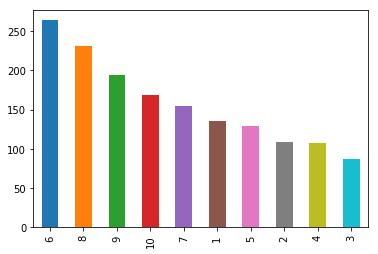

In [44]:
df_india['overall_rating'].value_counts().plot(kind='bar')

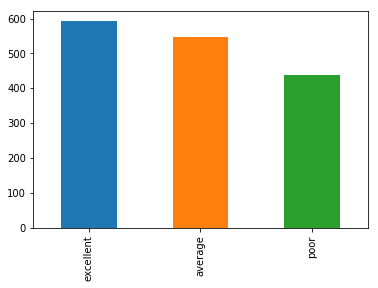

In [48]:
df_india['summary'].value_counts().plot(kind='bar')

In [49]:
df_india['airline_name'].value_counts()

jet-airways          727
air-india            326
airasia              308
indigo-airlines      109
spicejet              61
goair                 30
air-india-express     17
Name: airline_name, dtype: int64

In [53]:
'''def plot_sub_sentiment(Airline):
    df1=df_india[df_india['airline_name']==Airline]
    count=df['overall_rating'].value_counts()
    Index = [1,2,3,4,5,6,7,8,9,10]
    plt.bar(Index,count)
    plt.xticks(Index,['1','2','3','4','5','6','7','8','9','10'])#need to be verified
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(241)
plot_sub_sentiment('jet-airways')
plt.subplot(242)
plot_sub_sentiment('air-india')
plt.subplot(243)
plot_sub_sentiment('airasia')
plt.subplot(244)
plot_sub_sentiment('indigo-airlines')
plt.subplot(245)
plot_sub_sentiment('spicejet')
plt.subplot(246)
plot_sub_sentiment('goair')
plt.subplot(247)
plot_sub_sentiment('air-india-express')
'''

"def plot_sub_sentiment(Airline):\n    df1=df_india[df_india['airline_name']==Airline]\n    count=df['overall_rating'].value_counts()\n    Index = [1,2,3,4,5,6,7,8,9,10]\n    plt.bar(Index,count)\n    plt.xticks(Index,['1','2','3','4','5','6','7','8','9','10'])#need to be verified\n    plt.ylabel('Mood Count')\n    plt.xlabel('Mood')\n    plt.title('Count of Moods of '+Airline)\nplt.figure(1,figsize=(12, 12))\nplt.subplot(241)\nplot_sub_sentiment('jet-airways')\nplt.subplot(242)\nplot_sub_sentiment('air-india')\nplt.subplot(243)\nplot_sub_sentiment('airasia')\nplt.subplot(244)\nplot_sub_sentiment('indigo-airlines')\nplt.subplot(245)\nplot_sub_sentiment('spicejet')\nplt.subplot(246)\nplot_sub_sentiment('goair')\nplt.subplot(247)\nplot_sub_sentiment('air-india-express')\n"

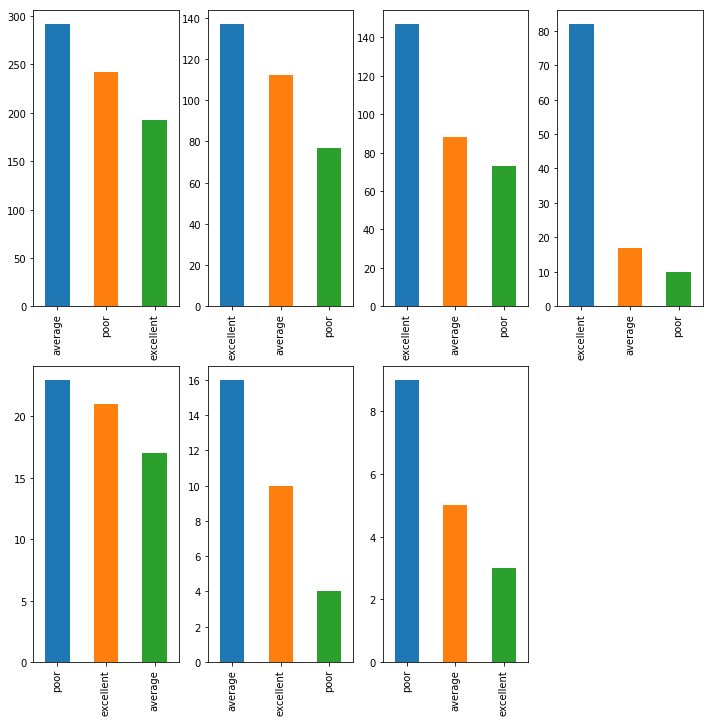

In [54]:
def plot_sub_sentiment(Airline):
    df1=df_india[df_india['airline_name']==Airline]
    df1['summary'].value_counts().plot(kind='bar')
plt.figure(1,figsize=(12, 12))
plt.subplot(241)
plot_sub_sentiment('jet-airways')
plt.subplot(242)
plot_sub_sentiment('air-india')
plt.subplot(243)
plot_sub_sentiment('airasia')
plt.subplot(244)
plot_sub_sentiment('indigo-airlines')
plt.subplot(245)
plot_sub_sentiment('spicejet')
plt.subplot(246)
plot_sub_sentiment('goair')
plt.subplot(247)
plot_sub_sentiment('air-india-express')

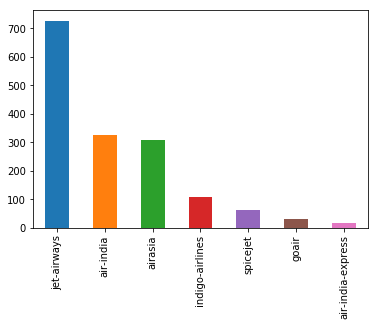

In [55]:
df_india['airline_name'].value_counts().plot(kind='bar')

In [56]:
from wordcloud import WordCloud,STOPWORDS

In [69]:
df2=df_india[df_india['summary']=='poor']
words = ' '.join(df2['content'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [70]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

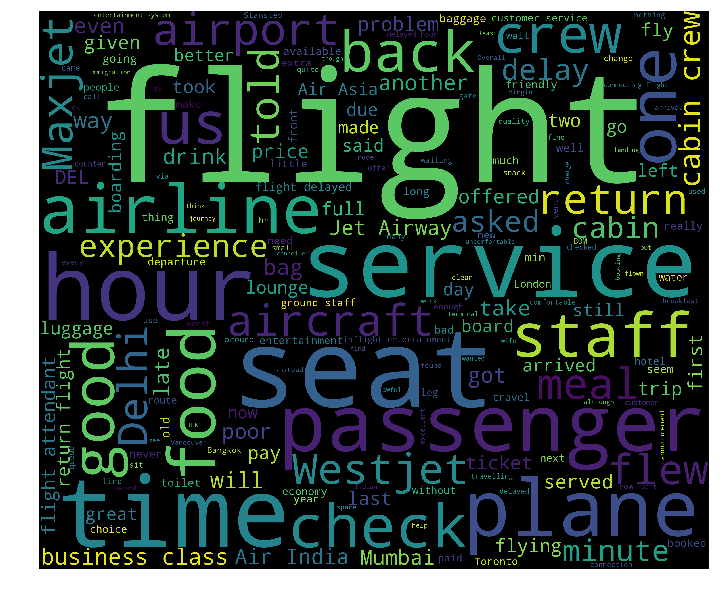

In [71]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [72]:
import re
import nltk
from nltk.corpus import stopwords

In [128]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)#replace sngle words in begining of sentence with " "
    words = letters_only.lower().split()#change all to lower case & split
    stops = set(stopwords.words("english"))#removing stopwords
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [129]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [130]:
df_india['clean_tweet']=df_india['content'].apply(lambda x: tweet_to_words(x))
df_india['Tweet_length']=df_india['content'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(df_india,test_size=0.2)
#df_india['clean_tweet']

In [76]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [26]:
#iht = InstanceHardnessThreshold(random_state=42)
#X_iht, y_iht = iht.fit_sample(train_features, y)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

In [100]:
#clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
#clf2 = KNeighborsClassifier(n_neighbors=1) 
clf1 = RandomForestClassifier(n_estimators=200)
clf2 = AdaBoostClassifier()   



Classifiers = [
    LogisticRegression(solver='liblinear',penalty='l1',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
     BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8),
     BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)]

In [101]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['summary'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['summary'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['summary'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    


Accuracy of LogisticRegressionis 0.5822784810126582
Accuracy of KNeighborsClassifieris 0.4588607594936709
Accuracy of SVCis 0.40189873417721517
Accuracy of DecisionTreeClassifieris 0.509493670886076
Accuracy of RandomForestClassifieris 0.6170886075949367
Accuracy of AdaBoostClassifieris 0.5981012658227848
Accuracy of GaussianNBis 0.47468354430379744
Accuracy of BaggingClassifieris 0.5791139240506329
Accuracy of BaggingClassifieris 0.5854430379746836


Text(0.5,1,u'Accuracies of Models')

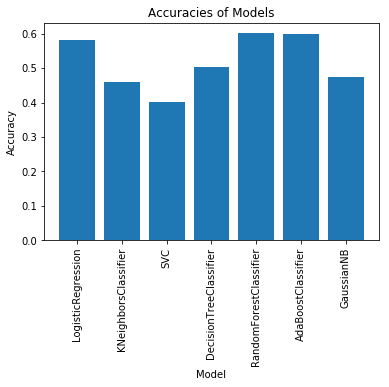

In [81]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')